In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold

import pickle

##from Classification import Classification
##from Ensemble import Ensemble

In [104]:
x_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_train_data.csv')
y_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_train_data.csv')

In [105]:
x_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_test_data.csv')
y_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_test_data.csv')

In [106]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  13208 non-null  int64
dtypes: int64(1)
memory usage: 103.3 KB


In [107]:
y_train.describe()

,rating
count,13208.000000
mean,3.002196
std,1.413167
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [108]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Columns: 175 entries, access to would
dtypes: float64(175)
memory usage: 17.6 MB


In [109]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['rating'],test_size=.25,random_state=42)

In [110]:
##skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
###

parameters = {
'alpha': (1,0.1,0.01, 0.001, 0.0001, 0.00001),
'fit_prior' : (True,False),
}
clf = MultinomialNB().fit(x_train, y_train)
predicted= clf.predict(x_val)
##
grid_search= GridSearchCV(clf, parameters, cv=5)
grid_search.fit(x_train,y_train)
###
grid_search.best_estimator_

MultinomialNB(alpha=0.001, fit_prior=False)

In [112]:
NB_classifier = MultinomialNB(alpha=0.001, fit_prior=False)
NB_classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.001, fit_prior=False)

<AxesSubplot:>

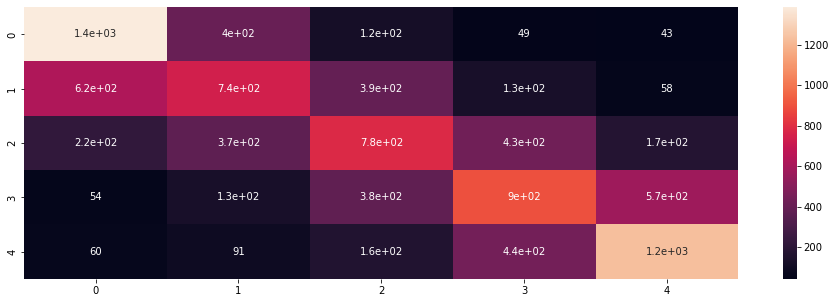

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot=True)

<AxesSubplot:>

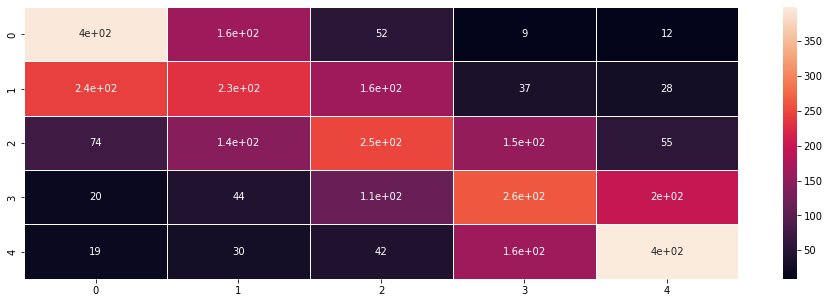

In [114]:
# Predicting the Test set results
y_predict_val = NB_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot=True, linewidths=.5)

In [115]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.53      0.63      0.57       633
           2       0.38      0.33      0.35       702
           3       0.40      0.37      0.39       674
           4       0.42      0.41      0.42       639
           5       0.58      0.61      0.59       654

    accuracy                           0.47      3302
   macro avg       0.46      0.47      0.46      3302
weighted avg       0.46      0.47      0.46      3302

